# Imports

In [2]:
import json
import pandas as pd
import os

# Schema

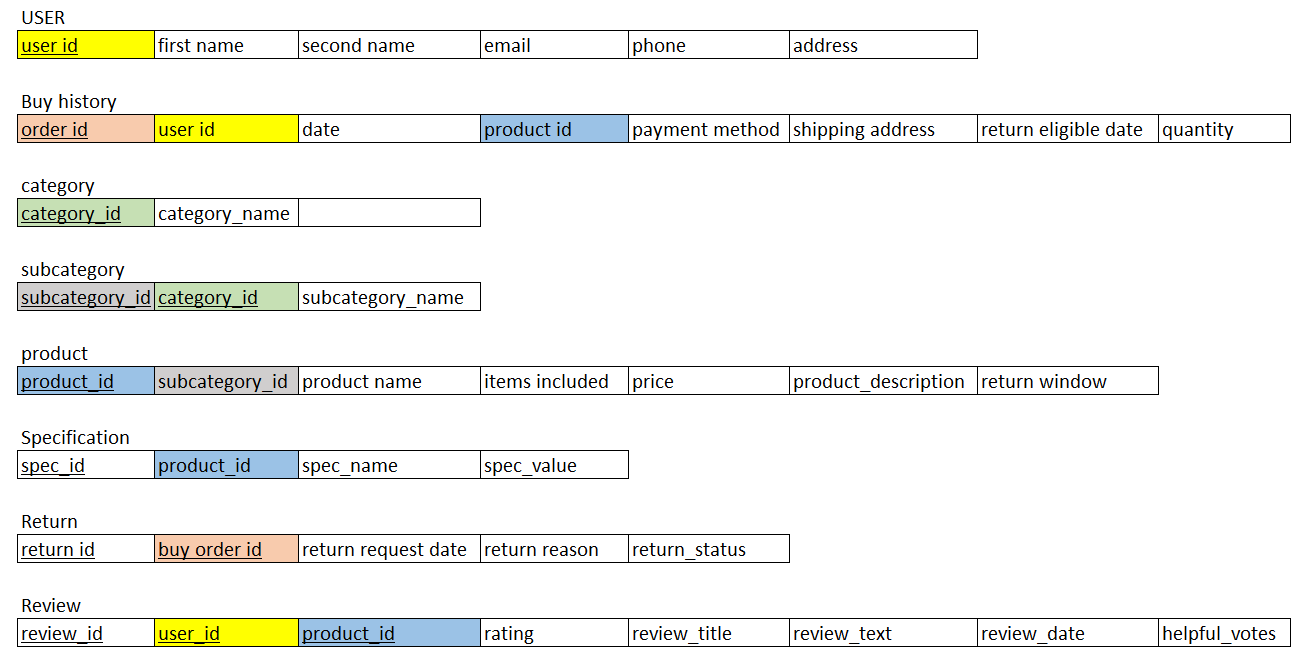

In [3]:
from IPython.display import Image, display

# Load and display a PNG image
image_path = "schema.png"  # Using schema.png which exists in the current directory
display(Image(filename=image_path))


# Checking the quality of data

In [4]:
def load_json(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found")
        return None
    except json.JSONDecodeError:
        print(f"Error: File '{file_path}' contains invalid JSON")
        return None

In [5]:
pwd

'D:\\Study\\Programs\\TSAI\\EAG_V1_CAPESTONE\\dev_docs'

In [6]:
user_df = pd.read_json(os.path.join("data", "data_from_llm", "user.json"))
buy_history_df = pd.read_json(os.path.join("data", "data_from_llm", "buy_history.json"))
category_df = pd.read_json(os.path.join("data", "data_from_llm", "category.json"))
subcategory_df = pd.read_json(os.path.join("data", "data_from_llm", "subcategory.json"))
product_df = pd.read_json(os.path.join("data", "data_from_llm", "product.json"))
specification_df = pd.read_json(os.path.join(r"data", "data_from_llm", "specification.json"))
return_history_df = pd.read_json(os.path.join(r"data", "data_from_llm", "return_history.json"))
review_df = pd.read_json(os.path.join(r"data", "data_from_llm", "review.json"))

In [7]:
# # INNER JOIN (only rows with matching product_id in both tables)
# inner_join = pd.merge(left, right, on="product_id", how="inner")

In [22]:
category_df["category_name"].value_counts()

category_name
Electronics    1
Utensils       1
Books          1
Sports         1
Name: count, dtype: int64

In [9]:
product_df

,product_id,subcategory_id,product_name,items_included,price,product_description,return_window
0,1001,101,ASUS ROG Strix G16 Gaming Laptop,"Laptop, Power Adapter, User Manual",1499.99,16-inch gaming laptop with Intel Core i9 proce...,30
1,1002,101,Apple MacBook Pro M2,"MacBook Pro, USB-C Power Adapter, USB-C Charge...",1799.99,"14-inch laptop with Apple M2 Pro chip, 16GB RA...",14
2,1003,101,Dell XPS 15 Ultrabook,"Laptop, Power Adapter, Quick Start Guide",1599.99,"15.6-inch laptop with Intel Core i7 processor,...",30
3,1004,101,Lenovo ThinkPad X1 Carbon,"Laptop, 65W AC Adapter, ThinkPad Pen",1399.99,14-inch business laptop with Intel Core i7 pro...,30
4,1005,101,HP Spectre x360 Convertible,"Laptop, Power Adapter, HP Pen, Protective Sleeve",1299.99,13.5-inch 2-in-1 laptop with Intel Core i7 pro...,30
...,...,...,...,...,...,...,...
95,4046,405,Echelon Stride Auto-Fold Smart Treadmill,"Treadmill, Assembly Tools, User Manual",1299.99,Compact auto-folding treadmill with 8 built-in...,30
96,4047,405,Life Fitness F3 Folding Treadmill,"Treadmill, Assembly Tools, User Manual",2999.99,Space-saving folding treadmill with FlexDeck s...,30
97,4048,405,Precor TRM 223 Energy Series Treadmill,"Treadmill, Assembly Tools, User Manual",2699.99,Commercial-quality treadmill with 3.0 HP motor...,30
98,4049,405,XTERRA Fitness TR150 Folding Treadmill,"Treadmill, Assembly Tools, User Manual",399.99,Entry-level folding treadmill with 2.25 HP mot...,30


### <u>Buying History</u>

#### user_id

In [10]:
# I want unique user_id from table user_df in a list
unique_user_ids_user_df = user_df['user_id'].unique().tolist()
unique_user_ids_buy_history = buy_history_df['user_id'].unique().tolist()

if len(unique_user_ids_user_df) == len(unique_user_ids_buy_history):
    print("All user_id are matching")

print(unique_user_ids_user_df)
print(unique_user_ids_buy_history)

All user_id are matching
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


#### product_id

In [11]:
product_ids_buy_df = buy_history_df['product_id'].unique().tolist()
product_ids_product_df = product_df['product_id'].unique().tolist()

if len(product_ids_buy_df) == len(product_ids_product_df):
    print("All user_id are matching")
else:
    print("Not all user_id are matching")
    print("proceed with second check")

    """ check if product_id in buy_history_df is in product_df"""
    for b_poi in product_ids_buy_df:
        if b_poi not in product_ids_product_df:
            print(f"b_poi: {b_poi} not in product_ids_product_df")

Not all user_id are matching
proceed with second check


### <u>Subcategory</u>

In [12]:
cat_id_1 = subcategory_df['category_id'].unique().tolist()
cat_id_2 = category_df['category_id'].unique().tolist()

for  cid1 in cat_id_1:
    if cid1 not in cat_id_2:
        print(f"cat_id_1: {cid1} not in cat_id_2")

### <u>Product</u>

In [13]:
subcat_id_1 = product_df['subcategory_id'].unique().tolist()
subcat_id_2 = subcategory_df['subcategory_id'].unique().tolist()

for cid1 in subcat_id_1:
    if cid1 not in subcat_id_2:
        print(f"subcat_id_1: {cid1} not in subcat_id_2")

### <u>Specification</u>

In [14]:
spec_prod_ids = specification_df['product_id'].unique().tolist()
prod_prod_ids = product_df['product_id'].unique().tolist()

for spec_prod_id in spec_prod_ids:
    if spec_prod_id not in prod_prod_ids:
        print(f"spec_prod_id: {spec_prod_id} not in prod_prod_ids")

### <u>Return</u>

In [15]:
r_buy_order_ids = return_history_df['buy_order_id'].unique().tolist()
b_buy_order_ids = buy_history_df['order_id'].unique().tolist()

for r_boi in r_buy_order_ids:
    if r_boi not in b_buy_order_ids:
        print(f"r_boi: {r_boi} not in b_buy_order_ids")

### <u>Review</u>

In [16]:
rev_user_ids = review_df['user_id'].unique().tolist()
u_user_ids = user_df['user_id'].unique().tolist()

for rev_user_id in rev_user_ids:
    if rev_user_id not in u_user_ids:
        print(f"rev_user_id: {rev_user_id} not in u_user_ids")

In [17]:
rev_prod_ids = review_df['product_id'].unique().tolist()
p_prod_ids = product_df['product_id'].unique().tolist()

for rev_prod_id in rev_prod_ids:
    if rev_prod_id not in p_prod_ids:
        print(f"rev_prod_id: {rev_prod_id} not in p_prod_ids")

In [18]:
1

1

In [19]:
pwd

'D:\\Study\\Programs\\TSAI\\EAG_V1_CAPESTONE\\dev_docs'

In [20]:
# Saving all data to final location

user_df.to_json(os.path.join("..", "db", "user.json"), orient="records")
buy_history_df.to_json(os.path.join("..", "db", "buy_history.json"), orient="records")
category_df.to_json(os.path.join("..", "db", "category.json"), orient="records")
subcategory_df.to_json(os.path.join("..", "db", "subcategory.json"), orient="records")
product_df.to_json(os.path.join("..", "db", "product.json"), orient="records")
specification_df.to_json(os.path.join("..", "db", "specification.json"), orient="records")
return_history_df.to_json(os.path.join("..", "db", "return_history.json"), orient="records")
review_df.to_json(os.path.join("..", "db", "reviews.json"), orient="records")

In [21]:
# Validation Complete